In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from nose.tools import assert_equal, ok_, assert_almost_equal
import time
import sys
from IPython.display import HTML, display
from utils import *
import numpy as np

# Problem Set 10: Backtracking and Backtracking with Forward Checking

0. [Credit for Contributors (required)](#contributors)

1. [Modeling Questions (20pts)](#prelim_questions)

2. [Backtracking Implementation (40pts)](#bt_implement)

3. [Backtracking with Forward Checking (30pts)](#btfc_implement)

4. [Comparison (10pts)](#bt_compare)
    
**100 points** total for Problem Set 10


## <a name="contributors"></a> Credit for Contributors

List the various students, lecture notes, or online resouces that helped you complete this problem set:

Ex: I worked with Bob on the cat activity planning problem.

<div class="alert alert-info">
Write your answer in the cell below this one.
</div>

I worked with Tom Stuart, Skye Eiskowitz and the twins on this assignment. I used an online resource @RosettaCode to help with my implementation, and I also found a nice summary of the Nqueens problem from another school at http://www.mi.fu-berlin.de/wiki/pub/ABI/Lecture12MaterialsOptWS12/CP2.pdf


## Background

In this problem set, you will be solving N-queens problem by formulating it as CSPs and coding your own implementation of the backtracking algorithms to perform search.
In the first part, you will implement backtracking search algorithm (BT), and in the second part, you will implement backtrack with forward-checking algorithm (BT-FC).

## The N-Queens Problem

You will test your backtrack algorithm implementations on the N-Queens problem. The key here is to implement a consistency check method that is specific to the N- Queens problem constraints.
For this problem, the goal is to place N queens on an NxN chess board so that no queen can capture another. Thus, no two queens can share a common row, column, or diagonal. We will use the following representation in this problem.
- Each variable specifies the row on which a particular queen is placed. Each queen is identified (indexed) with a column of the board. This automatically ensures that the queens will not share columns.
- The variable domains are the available row indices.
- The constraints between the variables specify that the corresponding queens do
not share a row or diagonal.

The program should take in an integer N and produce a solution for a N-Queens problem on a NxN chess board. The goal is to find a solution (a full assignment to all variables such that constraints are satisfied). You are not required to retrieve the entire solution space (there are many solutions to the N-Queens problem). An example solution for N=5 can look like the following:

```
Q - - - - 
- - - Q - 
- Q - - - 
- - - - Q 
- - Q - - 
```

Consider N >=4. You should see that for N=2 , N=3 there is no solution.

In your code, please **write appropriate comments where necessary** so that it is clear how your code implements BT and BT-FC on the N-queen problem. This will not only help graders follow your code, but is also a good coding habit that will be helpful to you in the future.
 

## Implementation Details


Your implementation will take one **input** `N`, the size of the N-Queens problem. Your implementation **must return a tuple of three elements**: `(solution, time, number of consistency checks)`. The first one is the solution to the N-Queens problem: a list of N elements, such that `list(i) = j` means that the queen in column `i` is located in row `j`. Note that there are N columns (`0..i..N-1`) and N rows (`0..j..N-1`). Your implementation must return `None` if there is no solution to the N-queens problem.

The assignment below is a valid output solution to the 5-Queen problem:

```python
five_queen_sol = [0, 3, 1, 4, 2]
```

The second element of the tuple that your functions must return is the time that it took to find (or not find) a solution. Finally, the third element of the tuple is the number of consistency checks that your implementation used through out the search.

All the above applies to **both** your implementation of backtrack search with and without forward checking.

For example, a call to `nqueens_backtracking(10)` returns the following in my simple implementation:

```python

([0, 2, 5, 7, 9, 4, 8, 1, 3, 6], 0.012913942337036133, 975)
```

In [3]:
### Useful code ###

#You can measure runtime using time.time( ) in the following way

# Example: run time calculation
def time_example(sleep_time):
    start_time = time.time()
    time.sleep(sleep_time)
    print("Function finished in %.3f seconds" % (time.time() - start_time))
time_example(2.3)

Function finished in 2.302 seconds


## Part 1 - Preliminary Questions (20 points)

<a name="prelim_questions"></a>


#### 1 -  Write out the variables, the domains, and the constraints for this N-Queens CSP. Constraints should be expressed in mathematical/pseudocode format.

<div class="alert alert-info">
Write your answer in the cell below this one.
</div>



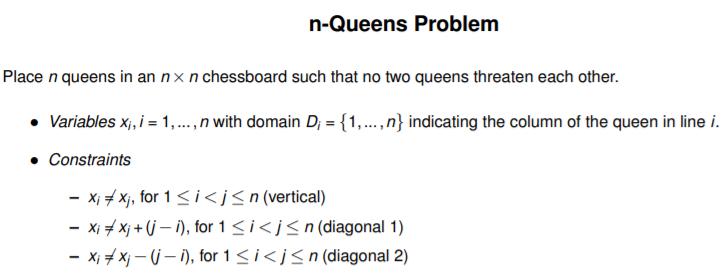

In [4]:
from IPython.core.display import Image, display
display(Image(filename='nqueens.PNG'))

Here is the formulation in pseudocode. I mentioned where I got this from using the resource referenced above.

#### 2 - What are the advantages of solving this problem as a CSP rather than a state space search over all possible configurations?

<div class="alert alert-info">
Write your answer in the cell below this one.
</div>

There are complexity analysis benefits of solving a CSP. State space sizes may become intractable as the number of variables increases. A constraint programming problem can help prune away parts of the state space instead of forcing us to search it.

#### 3 - How many different possible configurations (without considering the constraints) are there? In other words, what is the full state space in terms of N?

<div class="alert alert-info">
Write your answer in the cell below this one.
</div>

For an NxN board where we place N queens, there are N^2 choose N permutations available. Algebraically, this can be expressed as N^2!/((N^2-N)!)

#### 4 - Let’s say your Intel Core i7 can perform $10^{11}$ instructions per second, and that checking whether a distinct configuration is valid or not takes one instruction. How long would it take to check all possible configurations for `N=5`? `N=10`? How about `N=20`?

<div class="alert alert-info">
Write your answer in the cell below this one.
</div>

Using the permutation calculation from part 3: 
25 choose 5 = 6375600. 6375600/10^11= 6.376*10^-5 aka less than a second.
100 choose 10 = 62815650955529472000... 62815650955529472000/10^11 seconds is 174,487 hours. 
400 choose 20 = 6783809036694315968887136223950112217646314291200000.... 6783809036694315968887136223950112217646314291200000/10^11=1.884*10^37 hours or 2.15*10^33 years

## Part 2: Backtracking Implementation (40 points)

The lecture slides provide a description of the backtrack search algorithms. Please refer to these slides for help when implementing the backtrack method.

Remember to adhere to the function specification explained in the beginning of this document (that is, the function returns a 3-element tuple...)

<a name="bt_implement"></a>
Implement the function `nqueens_backtracking(N)` below.
</div>


In [8]:
def nqueens_backtracking(N):
  #YOUR CODE HERE
    start_time = time.time() #records the start time
    global counter
    counter=0#initialize a counter for the consistency checks, this is a global var
    if N<4: #there is no solution for N=2 or 3!
        return None
    def consistency_check(col, queens): #examines the feasiblity of putting a queen in a specific column; this is the constraint checker
        global counter
        counter += 1#increment my counter for consistency checking
        return col in queens or \
            any(abs(col - x) == len(queens)-i for i,x in enumerate(queens))
 
    def solve(n):# main function to recursively solve for solutions to the problem; this is a generator to create solutions
        solutions = [[]] #init an empty solutions var

        for row in range(n):
            solutions = (solution+[i+1]
                       for solution in solutions
                           for i in range(N)
                               if not consistency_check(i+1, solution))#checks to see if solution is feasible using the feas function
        return solutions
 
    answers = solve(N)
    first_answer = next(answers) #takes the first answer from the generator that is from my solve function
    ans=[]
    for i in range(0, len(first_answer)):
        ans.append(first_answer[i]-1) #move to the 0-frame of reference used in the checker
        
    return (ans, time.time()-start_time,counter)
    


In [9]:
# Test your code
# Don't modify this cell (it will be overwritten by the autograder)
# You can create new cells like this one to try things though.
# NOTE: The tests don't check everything. Passing the test doesn't mean that you will automatically get full grade.
# Our graders will check your code.
result, elapsed, nchecks = nqueens_backtracking(12)
if check_queens(result):
    print("Solution found in %.2f seconds using Backtracking. Used %d consistency checks." % (elapsed, nchecks))
    print("Solution: ")
    print_queens(result)
    test_ok()

Solution found in 0.01 seconds using Backtracking. Used 3066 consistency checks.
Solution: 
Q - - - - - - - - - - - 
- - - - - - - - Q - - - 
- Q - - - - - - - - - - 
- - - - - - - - - - - Q 
- - Q - - - - - - - - - 
- - - - - - Q - - - - - 
- - - - - - - - - Q - - 
- - - Q - - - - - - - - 
- - - - - - - - - - Q - 
- - - - Q - - - - - - - 
- - - - - - - Q - - - - 
- - - - - Q - - - - - - 


Test passed!!

In [10]:
# THIS COULD TAKE A WHILE! Ensure your code works with the above tests before running this cell.

# TABLE of backtracking results.
# Don't modify this cell (it will be overwritten by the autograder)
# You can create new cells like this one to try things though.
# NOTE: The tests don't check everything. Passing the test doesn't mean that you will automatically get full grade.
# Our graders will check your code.

N = range(4,21)
for i in N:
    print("Checking N-Queens backtracking solution (N=%02d)..."%i,)
    sys.stdout.flush()
    result, elapsed, nchecks = nqueens_backtracking(i)
    if check_queens(result):
        print("OK! (%.2f seconds and %d checks)" % (elapsed, nchecks))
test_ok()


Checking N-Queens backtracking solution (N=04)...
OK! (0.00 seconds and 26 checks)
Checking N-Queens backtracking solution (N=05)...
OK! (0.00 seconds and 15 checks)
Checking N-Queens backtracking solution (N=06)...
OK! (0.00 seconds and 171 checks)
Checking N-Queens backtracking solution (N=07)...
OK! (0.00 seconds and 42 checks)
Checking N-Queens backtracking solution (N=08)...
OK! (0.00 seconds and 876 checks)
Checking N-Queens backtracking solution (N=09)...
OK! (0.00 seconds and 333 checks)
Checking N-Queens backtracking solution (N=10)...
OK! (0.00 seconds and 975 checks)
Checking N-Queens backtracking solution (N=11)...
OK! (0.00 seconds and 517 checks)
Checking N-Queens backtracking solution (N=12)...
OK! (0.01 seconds and 3066 checks)
Checking N-Queens backtracking solution (N=13)...
OK! (0.00 seconds and 1365 checks)
Checking N-Queens backtracking solution (N=14)...
OK! (0.12 seconds and 26495 checks)
Checking N-Queens backtracking solution (N=15)...
OK! (0.08 seconds and 202

Test passed!!

## Part 3: Backtracking with Forward Checking Implementation (30 points)

The primary change should be to add code to perform forward checking from the backtrack method. This will require management of variable domain pruning and restoration during backtracking, as described in the lecture notes.

<a name="btfc_implement"></a>

<div class="alert alert-info">
Define the function `nqueens_backtracking_fc(N)` below.
</div>


In [78]:
def check_consistentcy(assignments, new_assignment, index):
    for col,q_row in enumerate(assignments):
        if new_assignment == q_row: 
            return False
        if abs(new_assignment - q_row) == abs(col - index): 
            return False
    return True
def row_forward_check(N, assignments, var_domains, col):
    counter = 0
    empty_domain=False
    for row in range(N): 
        if var_domains[-1][col][row] != 'no': 
            var_domains[-1][col][row] = 'no' 
            var_domains.append([list(row_list) for row_list in var_domains[-1]])
            for col_future in range(col + 1, N): 
                for row_future in range(N):
                    if var_domains[-1][col_future][row_future] != 'no': 
                        potential_assignment = assignments[:]
                        potential_assignment.append(row)
                        counter += 1
                        if check_consistentcy(potential_assignment, row_future, col_future)==False: 
                            var_domains[-1][col_future][row_future] = 'no'
                if (val for val in var_domains[-1][col_future]) == 'no':  
                    empty_domain = True
                    var_domains = var_domains[:-1]
                    break
            if empty_domain==False:
                return row, counter, var_domains
    return None, counter, var_domains
def nqueens_backtracking_fc(N):
    start_time = time.time()
    colomun=0
    assignments= []
    counter=0
    var_domains = []
    for q in range(N):
        domain = [s for s in range(N)]
        var_domains.append(domain)
    var_domains=[var_domains] 
    while colomun <= N - 1:
        new_assignment, new_counter,var_domains= row_forward_check(N, assignments, var_domains, colomun) 
        counter += new_counter
        if new_assignment == None: 
            assignments = assignments[:-1] 
            var_domains = var_domains[:-1]
            colomun -= 1 #go back to previous column
        else:
            assignments.append(new_assignment)
            colomun += 1
    if colomun !=N:
        solution = None
    else:
        solution = assignments
    
    return (solution, time.time()-start_time, counter)


In [79]:
# Test your code
# Don't modify this cell (it will be overwritten by the autograder)
# You can create new cells like this one to try things though.
# NOTE: The tests don't check everything. Passing the test doesn't mean that you will automatically get full grade.
# Our graders will check your code.
result, elapsed, nchecks = nqueens_backtracking_fc(12)
if check_queens(result):
    print("Solution found in %.2f seconds using Backtracking-FC. Used %d consistency checks." % (elapsed, nchecks))
    print("Solution: ")
    print_queens(result)
    test_ok()

Solution found in 0.03 seconds using Backtracking-FC. Used 3396 consistency checks.
Solution: 
Q - - - - - - - - - - - 
- - - - - - - - Q - - - 
- Q - - - - - - - - - - 
- - - - - - - - - - - Q 
- - Q - - - - - - - - - 
- - - - - - Q - - - - - 
- - - - - - - - - Q - - 
- - - Q - - - - - - - - 
- - - - - - - - - - Q - 
- - - - Q - - - - - - - 
- - - - - - - Q - - - - 
- - - - - Q - - - - - - 


Test passed!!

In [75]:
# THIS COULD TAKE A WHILE! Ensure your code works with the above tests before running this cell.

# TABLE of backtracking-fc results.
# Don't modify this cell (it will be overwritten by the autograder)
# You can create new cells like this one to try things though.
# NOTE: The tests don't check everything. Passing the test doesn't mean that you will automatically get full grade.
# Our graders will check your code.

N = range(4,21)
for i in N:
    print("Checking N-Queens backtracking-fc solution (N=%02d)..."%i,)
    sys.stdout.flush()
    result, elapsed, nchecks = nqueens_backtracking_fc(i)
    if check_queens(result):
        print("OK! (%.2f seconds and %d checks)" % (elapsed, nchecks))
test_ok()


Checking N-Queens backtracking-fc solution (N=04)...
OK! (0.00 seconds and 40 checks)
Checking N-Queens backtracking-fc solution (N=05)...
OK! (0.00 seconds and 34 checks)
Checking N-Queens backtracking-fc solution (N=06)...
OK! (0.00 seconds and 244 checks)
Checking N-Queens backtracking-fc solution (N=07)...
OK! (0.00 seconds and 98 checks)
Checking N-Queens backtracking-fc solution (N=08)...
OK! (0.00 seconds and 944 checks)
Checking N-Queens backtracking-fc solution (N=09)...
OK! (0.00 seconds and 483 checks)
Checking N-Queens backtracking-fc solution (N=10)...
OK! (0.00 seconds and 1178 checks)
Checking N-Queens backtracking-fc solution (N=11)...
OK! (0.00 seconds and 833 checks)
Checking N-Queens backtracking-fc solution (N=12)...
OK! (0.01 seconds and 3396 checks)
Checking N-Queens backtracking-fc solution (N=13)...
OK! (0.01 seconds and 1861 checks)
Checking N-Queens backtracking-fc solution (N=14)...
OK! (0.16 seconds and 25951 checks)
Checking N-Queens backtracking-fc solutio

Test passed!!

## Part 4: Compare your results (10 points)

#### Do you see any difference between the Backtracking and Backtracking-FC results?

If so, why? If not, why do you think you didn't seen any difference? Did you expect to see a difference?

<a name="bt_compare"></a>

<div class="alert alert-info">
Write your answer in the cell below this one.
</div>

Using intuition I expect to see fewer consistency checks using Backtracking FC. I also expect it to run more quickly. This is because at each go around the loop we end up pruning part of the possible domain for making assignments. This means we don't need to execute as many consistency checks. However - my part 1 runs a lot faster than the second part. I think this is because I used recursion for the backtracking instead of a brute force method that I used for FC.